<a href="https://colab.research.google.com/github/Pataweepr/ComEngMath2/blob/master/(ComEngMath2)FFT_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install soundfile

In [ ]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import matplotlib.pyplot as plt
import IPython.display as ipd

In [ ]:
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts
# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

h= np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

In [ ]:
print(fs)

[0.00192845 0.00145128 0.00308372]


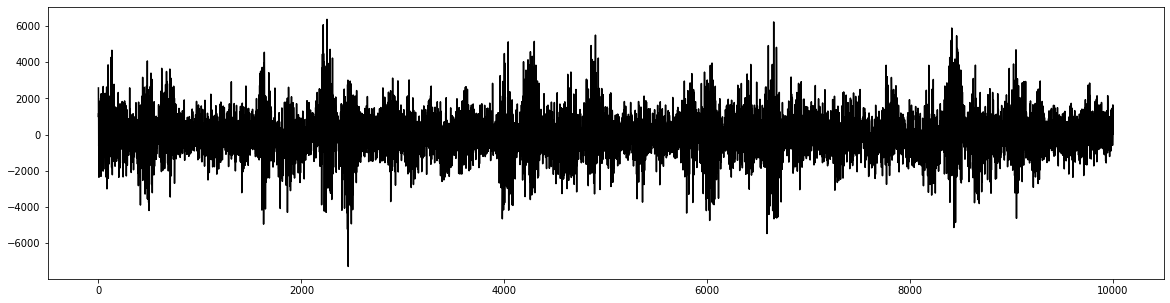

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(t,h_w_noise,'k',label='Signal')
plt.show()

In [ ]:
Hn = np.fft.fft(h_w_noise)
Hn

array([ 87623.62124002+7.27595761e-12j, 181840.67325704-4.66135985e+04j,
       223431.5831767 -1.40546585e+05j, ...,
        78075.70930619-4.65689303e+04j, 223431.5831767 +1.40546585e+05j,
       181840.67325704+4.66135985e+04j])

In [ ]:
freq = np.fft.fftfreq(N) # first values -- off-set
print(freq)
print(len(freq))

[ 0.00000000e+00  9.99900010e-05  1.99980002e-04 ... -2.99970003e-04
 -1.99980002e-04 -9.99900010e-05]
10001


In [ ]:
ind_freq = np.arange(1,N//2+1)
freq_pos =  freq[ind_freq]
print(freq_pos)
freq_neg = freq[-ind_freq]
print(freq_neg)

[9.99900010e-05 1.99980002e-04 2.99970003e-04 ... 4.99750025e-01
 4.99850015e-01 4.99950005e-01]
[-9.99900010e-05 -1.99980002e-04 -2.99970003e-04 ... -4.99750025e-01
 -4.99850015e-01 -4.99950005e-01]


In [ ]:
psd =  np.abs(Hn[ind_freq])**2 + np.abs(Hn[-ind_freq])**2 # power spec density 
print(psd)

[7.04777160e+10 1.39350030e+11 1.65289633e+10 ... 9.98112710e+09
 5.56533508e+09 9.68233861e+09]


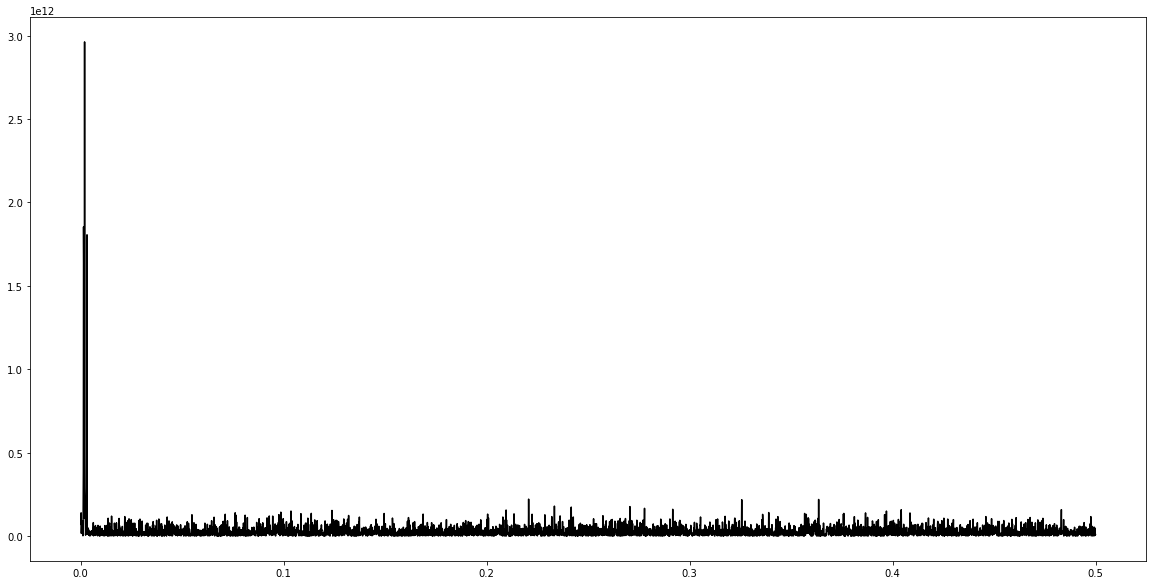

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(freq[ind_freq],psd,'k-')
plt.show()

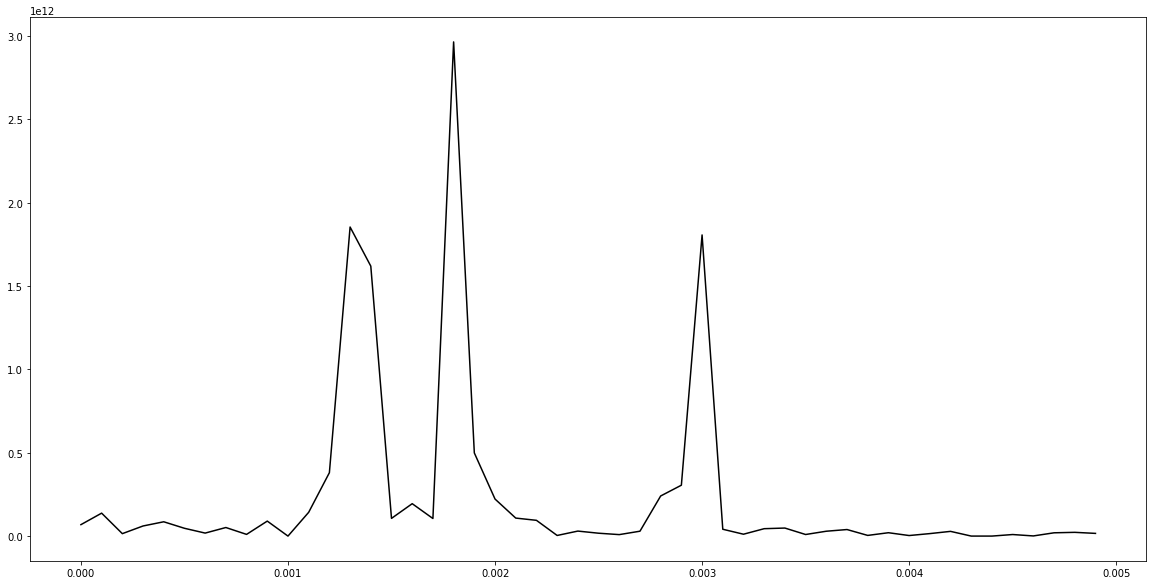

In [ ]:
zoom_ind = 50
plt.figure(figsize=(20, 10))
plt.plot(freq[:zoom_ind],psd[:zoom_ind],'k-')
plt.show()

In [ ]:
idx_sel = np.where(psd>0.4e12)
idx_sel

(array([13, 14, 18, 19, 30]),)

In [ ]:
Hn_cut = np.zeros_like(Hn)
Hn_cut[ind_freq[idx_sel]] = Hn[ind_freq[idx_sel]]
Hn_cut[-ind_freq[idx_sel]] = Hn[-ind_freq[idx_sel]]

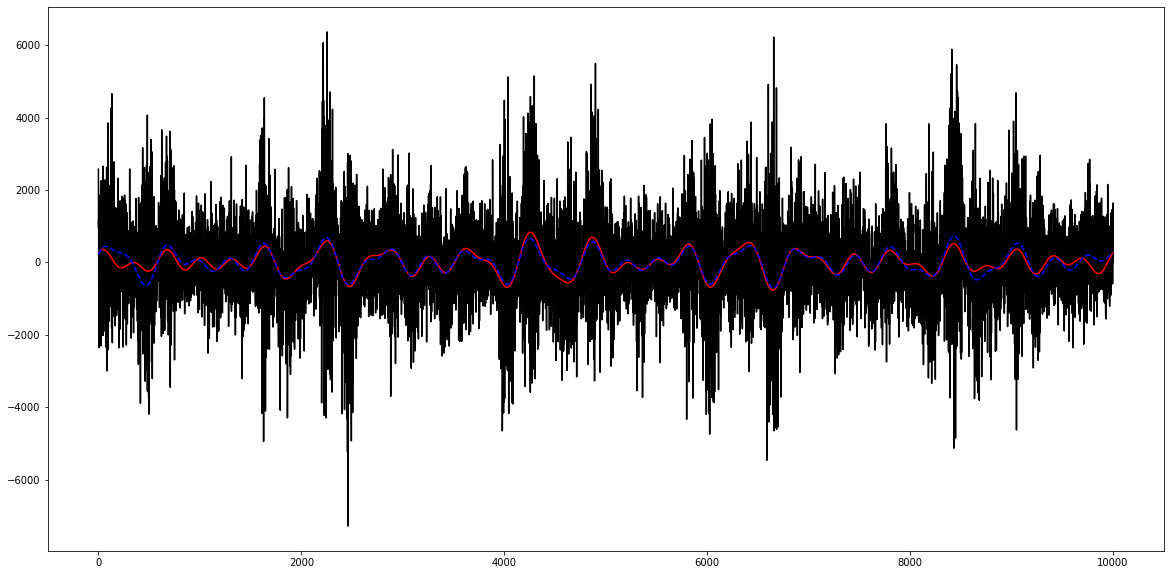

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(t,h_w_noise,'k',label='Signal')
plt.plot(t,np.fft.ifft(Hn_cut).real,'r-',label='filter')
plt.plot(t,h,'b--',label='clean_signal')
plt.show()

In [ ]:
sr = 22050
ipd.Audio(h, rate=sr)

In [ ]:
ipd.Audio(h_w_noise, rate=sr)

In [ ]:
# np.sum(np.fft.ifft(Hn_cut).real < 0 )

In [ ]:
ipd.Audio(np.fft.ifft(Hn_cut).real, rate=sr)

In [ ]:
print(freq_pos[idx_sel])
print(fs)

[0.00139986 0.00149985 0.00189981 0.0019998  0.00309969]
[0.00192845 0.00145128 0.00308372]


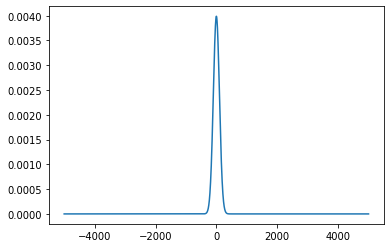

In [ ]:
# conv with gussian
sigma = 100.
tt = np.arange(-N//2,N//2)
g = np.exp(-tt**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
plt.plot(tt,g)

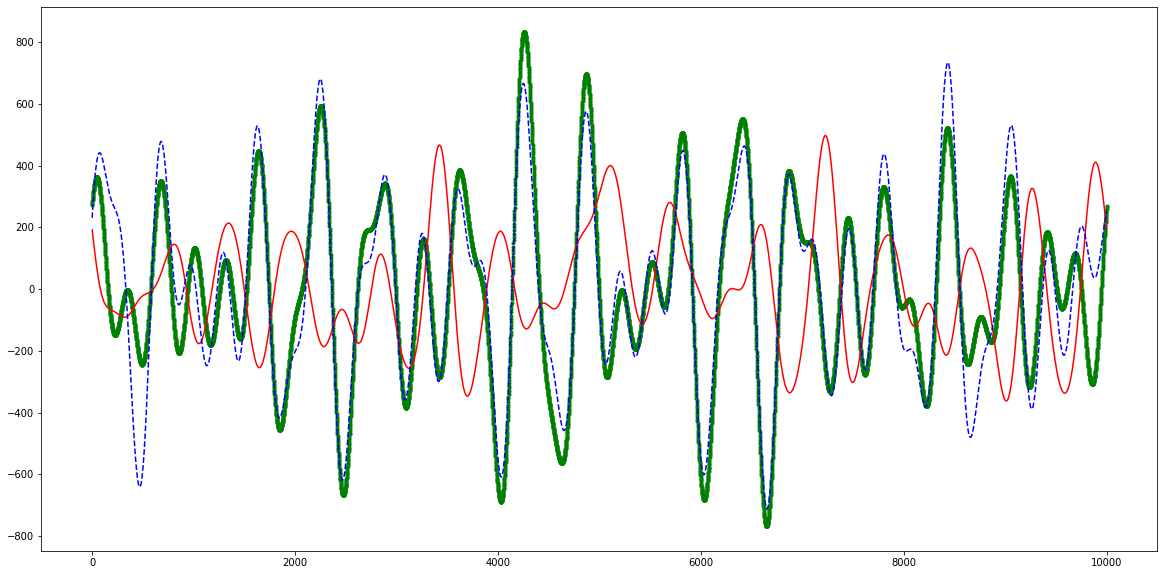

In [ ]:
G = np.fft.fft(g)
HG = Hn*G 

plt.figure(figsize=(20, 10))
# plt.plot(t,h_w_noise,'k',label='Signal')
plt.plot(t,np.fft.ifft(Hn_cut).real,'g.',label='cut')
plt.plot(t,np.fft.ifft(HG).real,'r-',label='g_filter')
plt.plot(t,h,'b--',label='clean_signal')
plt.show()

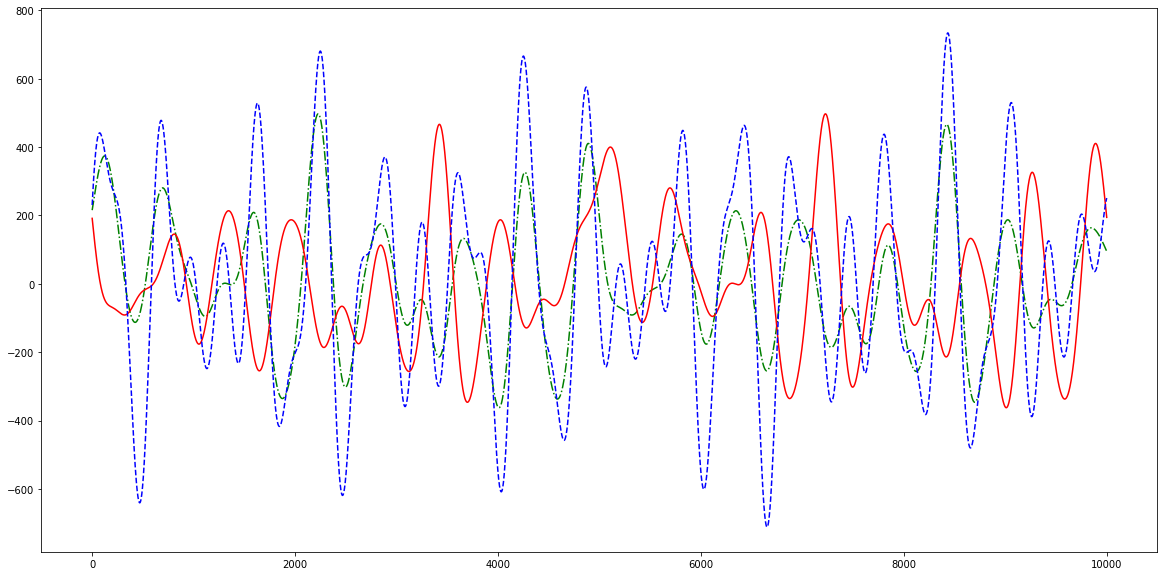

In [ ]:
hn_smooth2 = np.convolve(h_w_noise,g)

plt.figure(figsize=(20, 10))
plt.plot(t,hn_smooth2[N//2:3*N//2],'g-.',label='g_filter1')
plt.plot(t,np.fft.ifft(HG).real,'r-',label='g_filter2')
plt.plot(t,h,'b--',label='clean_signal')
plt.show()

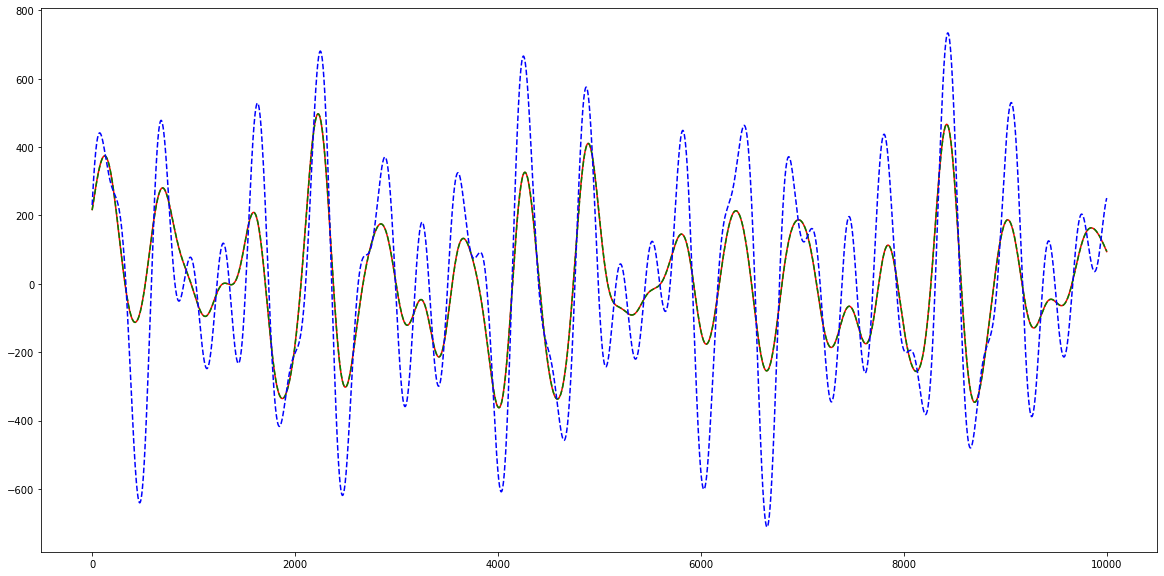

In [ ]:
hz = np.zeros(2*N)
hz[N:2*N] = h_w_noise
Hz = np.fft.fft(hz)
tt = np.arange(-N,N)
g = np.exp(-tt**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
G = np.fft.fft(g)
HzG = Hz*G 
hz_new = np.fft.ifft(HzG)


plt.figure(figsize=(20, 10))
plt.plot(t,hz_new[:N].real,'r-',label='g_filter2')
plt.plot(t,hn_smooth2[N//2:3*N//2].real,'g--',label='g_filter1')
plt.plot(t,h,'b--',label='clean_signal')
plt.show()

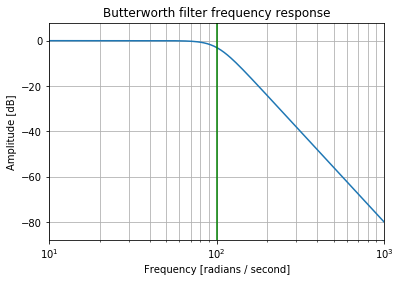

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

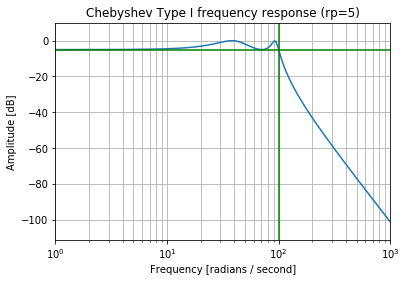

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.cheby1(4, 5, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

In [ ]:
b,a

(array([8500692.02673987]),
 array([1.00000000e+00, 4.17405778e+01, 1.08711379e+04, 2.80480674e+05,
        1.51166056e+07]))

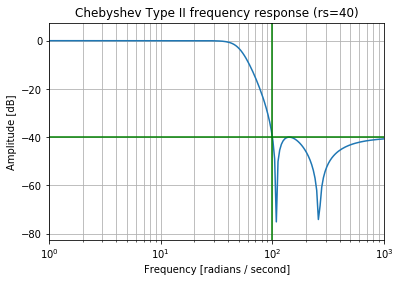

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.cheby2(4, 40, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response (rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.show()

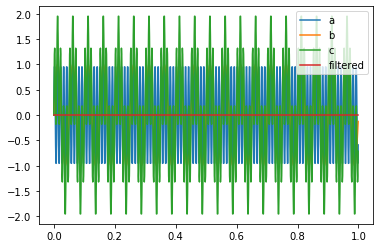

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 1000  # Sampling frequency
# Generate the time vector properly
t = np.arange(1000) / fs
signala = np.sin(2*np.pi*100*t) # with frequency of 100
plt.plot(t, signala, label='a')

signalb = np.sin(2*np.pi*20*t) # frequency 20
plt.plot(t, signalb, label='b')

signalc = signala + signalb
plt.plot(t, signalc, label='c')

fc = 30  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low',fs = fs) 
output = signal.filtfilt(b, a, signalc)
plt.plot(t, output, label='filtered')
plt.legend()
plt.show()

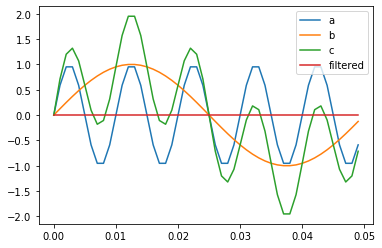

In [ ]:
N_see = 50
plt.plot(t[:N_see], signala[:N_see], label='a')
plt.plot(t[:N_see], signalb[:N_see], label='b')
plt.plot(t[:N_see], signalc[:N_see], label='c')
plt.plot(t[:N_see], output[:N_see], label='filtered')
plt.legend()

explain D2A converter

explain alising problem from hw 1

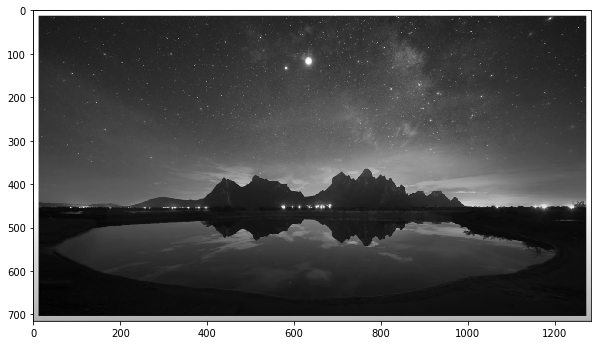

In [ ]:
from skimage.io import imread
im = np.mean(imread('Screen Shot 2563-07-19 at 20.46.06.png'), axis=2)
plt.figure(figsize=(10, 10))
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

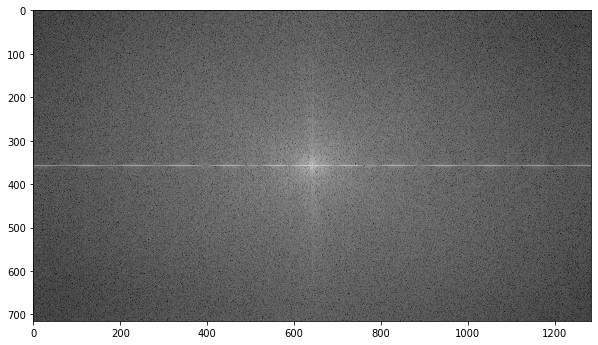

In [ ]:
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

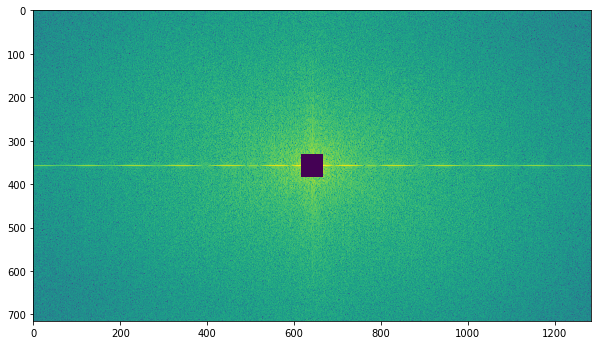

In [ ]:
# F1
(w, h) = im.shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 25
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int))
plt.show()

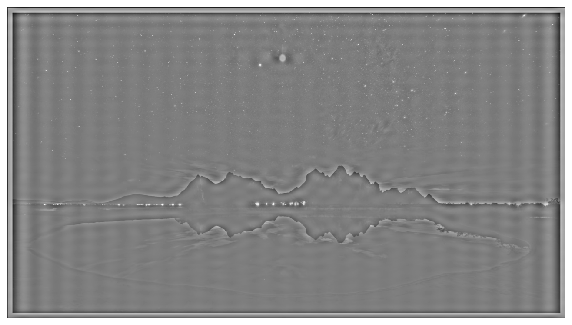

In [ ]:
im1 = fftpack.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

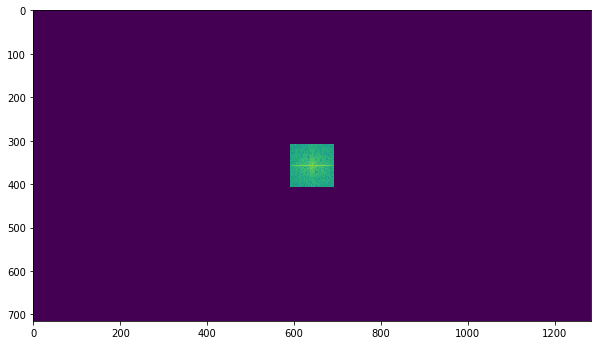

In [ ]:
# F1 = fftpack.fft2((im).astype(float))
F2_2 = fftpack.fftshift(F1) # FFT center zeros freq
F2_new = np.zeros_like(F2_2)

# high pass filter
n = 50
F2_new[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = F2_2[half_w-n:half_w+n+1,half_h-n:half_h+n+1]

# select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2_new))).astype(int))
plt.show()

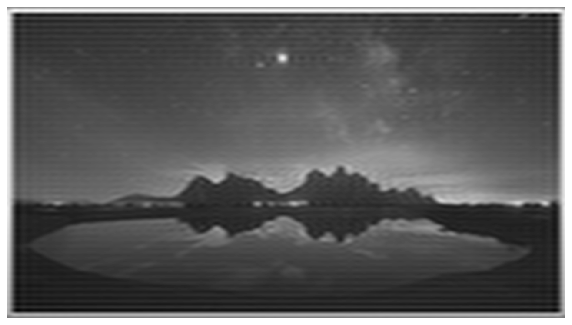

In [ ]:
im2 = fftpack.ifft2(fftpack.ifftshift(F2_new)).real
plt.figure(figsize=(10,10))
plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.show()